# Homework w03d01

This exercise involves the Auto data set in the attached file also obtainable with additional information from  https://archive.ics.uci.edu/ml/datasets/Auto+MPG. 
1. Make sure that the missing values have been removed from the data.
1. Which of the predictors are quantitative, and which are qualitative?
1. What is the range of each quantitative predictor?
1. What is the mean and standard deviation of each quantitative predictor?
1. Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?
1. Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.
1. Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

In [1]:
# load relevant libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('Auto.csv')

### 1. Make sure that the missing values have been removed from the data.

In [13]:
df.shape

(397, 9)

In [3]:
# Check how many missing values per column
df.apply(lambda x: np.sum(pd.isnull(x)))

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [4]:
#Quickly check the data set head and tail
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


There appears to be no data missing in the dataset

### 2. Which of the predictors are quantitative, and which are qualitative?
Some predictors are clearly quantitative: pmg, displacement, horsepower, weight, acceleration.

Some others are clearly qualitative: origin.

For cyclinders and year, this is arguable. My gutt feeling is that we should treat cylinders are quantitative and year and qualitative.


### 3. What is the range of each quantitative predictor?
See question 4
### 4. What is the mean and standard deviation of each quantitative predictor?

In [7]:
df.ix[:,:6].describe()

,mpg,cylinders,displacement,weight,acceleration
count,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668
std,7.825804,1.701577,104.379583,847.904119,2.749995
min,9.000000,3.000000,68.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


### 5. Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [12]:
df_sub=df.drop(df.index[10:86])
df_sub.shape

(321, 9)

### 6. Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

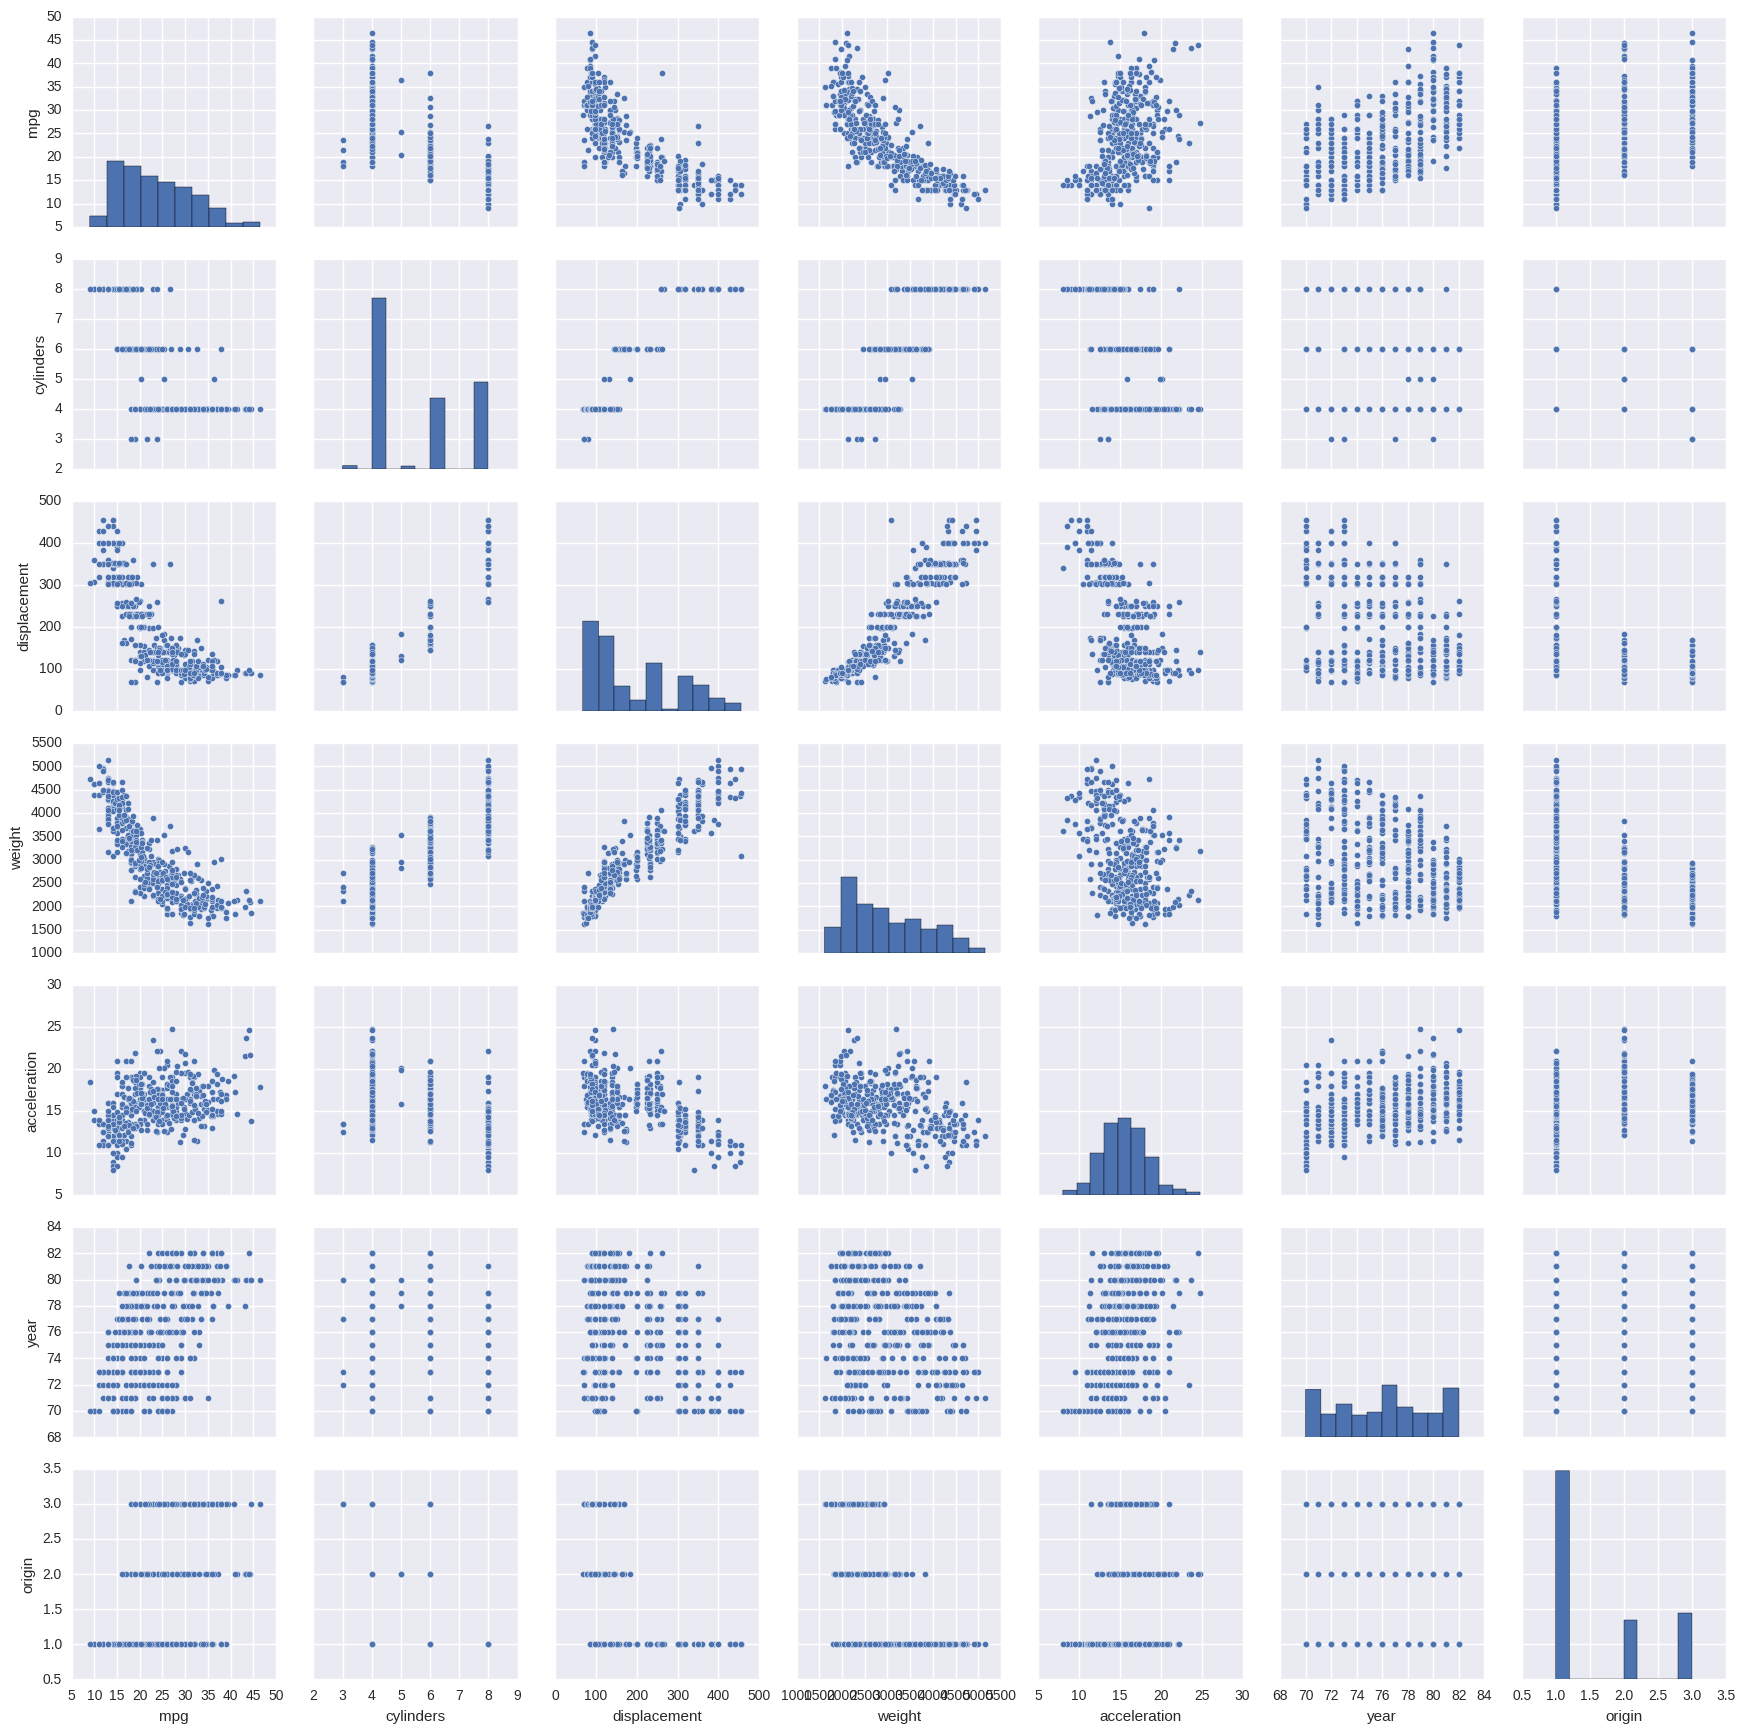

In [17]:
sns.pairplot(df)

Looking at the scatter plots above, there appears to be a negative correlation between cylinders, displacement, weight and miles per gallon.
There also appears to be a correlation, but this time positive, between acceleration, year and origin.
Since origin is categorical (qualitative), the correlation as such makes little sense, however there does seem to be a trend with cars from origin 3 having a higher mpg than cars from origin 2, who in turn also have higher mpg than cars from origin 1.

### 7. Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

Since there appears to be correlation between the 6 variables and the outcome, I woudl recommand including them all in the model.